## Business problem

Customer churn occurs when customers cease doing business with a firm. Retaining existing customers is more cost efficient than trying to attract new customers. 

With intense competition in the telecommunications industry, it would thus be advantageous for a firm to be able to predict if certain customers are likely to cease their service since the firm may attempt to persuade them to stay through various means such as attractive discounts or packages.

#### Columns are masked in the data set 

### Task and Approach: 

The goal is to predict target (Customer will churn or not ) by Using different machine learning algorithms Here we are going to use SVM classifier.

The “Churn” column is our target.why a customer is leaving company products and what are factors leading customers to churn

In [1]:
#Importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, make_scorer,\
accuracy_score, roc_curve, classification_report, confusion_matrix
import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder

In [2]:
#Reading a CSV file
df = pd.read_csv('C:\\Users\\admin\\Desktop\\Data Science(IMS)\\ML & AI\\SVM\\cs\\Case 2\\TCChurn.csv')

In [3]:
#Dimension of the dataframe
df.shape

(7043, 21)

In [4]:
#Viewing first 5 rows of the data
df.head()

,customerID,gender,V1,V2,V3,V4,V5,V6,V7,V8,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Display name of all columns of dataframe
df.columns

Index(['customerID', 'gender', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'Churn'],
      dtype='object')

In [6]:
#Viewing data type of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerID  7043 non-null   object 
 1   gender      7043 non-null   object 
 2   V1          7043 non-null   int64  
 3   V2          7043 non-null   object 
 4   V3          7043 non-null   object 
 5   V4          7043 non-null   int64  
 6   V5          7043 non-null   object 
 7   V6          7043 non-null   object 
 8   V7          7043 non-null   object 
 9   V8          7043 non-null   object 
 10  V9          7043 non-null   object 
 11  V10         7043 non-null   object 
 12  V11         7043 non-null   object 
 13  V12         7043 non-null   object 
 14  V13         7043 non-null   object 
 15  V14         7043 non-null   object 
 16  V15         7043 non-null   object 
 17  V16         7043 non-null   object 
 18  V17         7043 non-null   float64
 19  V18         7043 non-null  

### Data Quality and missing values check

Lets write one function to find out missing values ,unique values ,data types 

In [7]:
#Create function to get summary about dataframe
def df_summary(df):
    df_U = df.nunique()
    df_M = df.isnull().sum()
    df_I = df.dtypes
    df_U = df_U.to_frame().reset_index()
    df_M = df_M.to_frame().reset_index()
    df_I = df_I.to_frame().reset_index()
    df_U = df_U.rename(columns = {0 : 'Unique Data'})
    df_M = df_M.rename(columns = {0 : 'Missing Data'})
    df_I = df_I.rename(columns = {0 : 'Data Types'})
    result = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    return result

In [8]:
#Calling above function
df_summary(df)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,V1,0,2,int64
3,V2,0,2,object
4,V3,0,2,object
5,V4,0,73,int64
6,V5,0,2,object
7,V6,0,3,object
8,V7,0,3,object
9,V8,0,3,object


#### Important points to note from above dataframe 

-> From Data types we can identify one 2 integer ,1 float ,18 string variables are there in our data.

-> From Unique values

    1 . 13 variables having binary & multi class
    2 . We know that Customer ID has uniqueness in the data
    3 . All variables are looking good but Surprislingly among all the variables V18 having many classes 
    
-> We will look into the variables more closely

In [9]:
#View first 5 records of V18 column
df.V18.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: V18, dtype: object

-> Seems the variables is wrongly classified as object data type.

-> We will convert this column into Numerical.

In [10]:
#Convert V18 column into numerical column
df.V18 = pd.to_numeric(df.V18, errors='coerce')
#Let's check data type of V18 column again by calling df_summary function
df_summary(df)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,V1,0,2,int64
3,V2,0,2,object
4,V3,0,2,object
5,V4,0,73,int64
6,V5,0,2,object
7,V6,0,3,object
8,V7,0,3,object
9,V8,0,3,object


-> After coverting to numerical we have identified that there are 11 missing oberveration in V18 Variable.

-> Lets Impute the missing values with the mean of the variables since it has only 11

In [11]:
#Replacing missing values in V18 columns with mean of this column
df['V18'].fillna(df['V18'].mean(),inplace=True)
df['V18'].isnull().sum()

0

As we dicussed above we will drop the customer id column since it will not give much more prediciton 

In [12]:
#Drop customerID column
df.drop('customerID', axis=1, inplace=True)
df.columns

Index(['gender', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'Churn'],
      dtype='object')

Lets seprate Numerical columns and object columns seperatly.

In [13]:
#Seperating numerical columns and categorical columns.
Num_Cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
Cat_Cols = df.select_dtypes(include='object').columns.tolist()
print("Numerical columns : ",Num_Cols,"Categorical columns : ",Cat_Cols,sep='\n')

Numerical columns : 
['V1', 'V4', 'V17', 'V18']
Categorical columns : 
['gender', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'Churn']


Lets see all the categorical & Numerical information one by one.

Numerical variables we can use describe function directly 

In [14]:
#Describe numerical columns
df.describe()

,V1,V4,V17,V18
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
#Describe categorical columns
df.describe(include=np.object)

,gender,V2,V3,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


-> We can see those values w.r.to Target data.

-> Lets plot these variables with target.

### Plotting graphs (Data Visualization) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF97119AC0>,
      dtype=object)

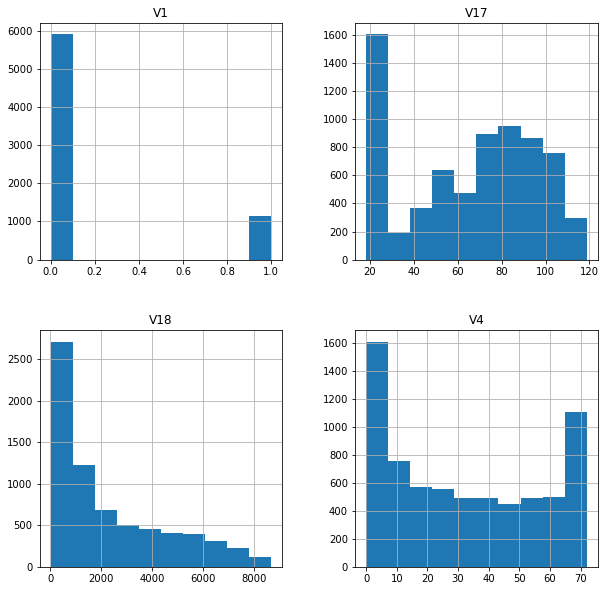

In [16]:
#Plotting histogram of all numerical columns
df[Num_Cols].hist(figsize=(10,10))

Data is skewed in V17 & V18 varibles 

#### Lets see the binary and multiclass variables


Creating function to see all the object data type variables using single function

In [17]:
#Creating function to display details of categorical data
def category_col_desc(data):
    col_list = data.select_dtypes(include=np.object).columns.tolist()
    for i in col_list:
        print("Variable : ",i)
        print("Count of unique values : ",len(set(data[i])))
        print("Unique values : ",set(data[i]))
        print("#############################################################")

In [18]:
#Calling above function
category_col_desc(df)

Variable :  gender
Count of unique values :  2
Unique values :  {'Male', 'Female'}
#############################################################
Variable :  V2
Count of unique values :  2
Unique values :  {'Yes', 'No'}
#############################################################
Variable :  V3
Count of unique values :  2
Unique values :  {'Yes', 'No'}
#############################################################
Variable :  V5
Count of unique values :  2
Unique values :  {'Yes', 'No'}
#############################################################
Variable :  V6
Count of unique values :  3
Unique values :  {'Yes', 'No', 'No phone service'}
#############################################################
Variable :  V7
Count of unique values :  3
Unique values :  {'No', 'Fiber optic', 'DSL'}
#############################################################
Variable :  V8
Count of unique values :  3
Unique values :  {'Yes', 'No', 'No internet service'}
###########################################

In [19]:
#Classify binary class variables and multi class variables
Binary_Class = df[Cat_Cols].nunique()[df[Cat_Cols].nunique() == 2].keys().tolist()
Multi_Class = df[Cat_Cols].nunique()[df[Cat_Cols].nunique() > 2].keys().tolist()
print("Binary Class : ",Binary_Class)
print("Multi Class : ",Multi_Class)

Binary Class :  ['gender', 'V2', 'V3', 'V5', 'V15', 'Churn']
Multi Class :  ['V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16']


#### Look at distribution of binary class variables 

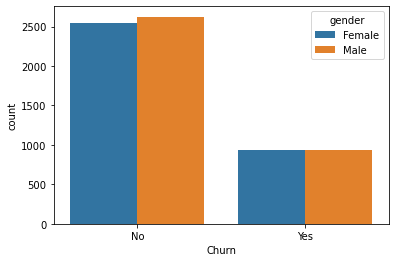

In [20]:
#Plot count plot of churn by gender wise
sns.countplot(x='Churn', hue='gender', data=df)

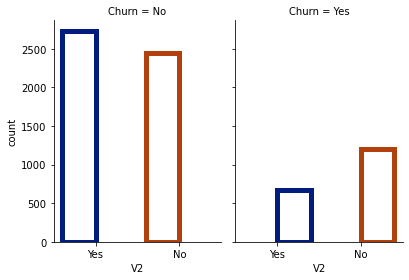

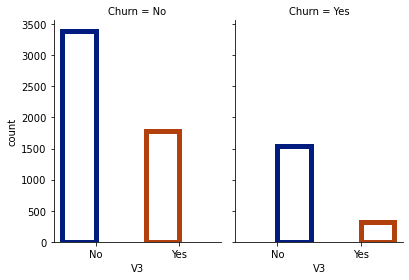

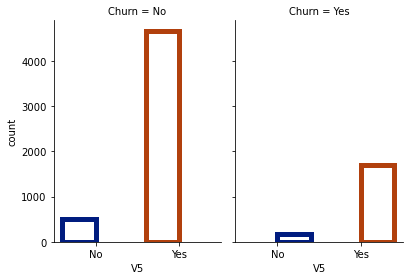

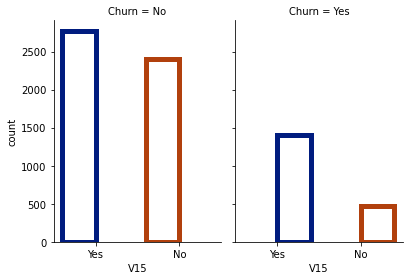

In [21]:
#Plotting catplot of all binary class variables
for i in Binary_Class:
    if i !='gender' and i!='Churn':
        sns.catplot(x=i, hue='Churn', col='Churn', data=df, kind='count', height=4, aspect=0.7, facecolor=(0,0,0,0),
           linewidth=5, edgecolor=sns.color_palette('dark',5))

#### Look at distribution of multi class variables 

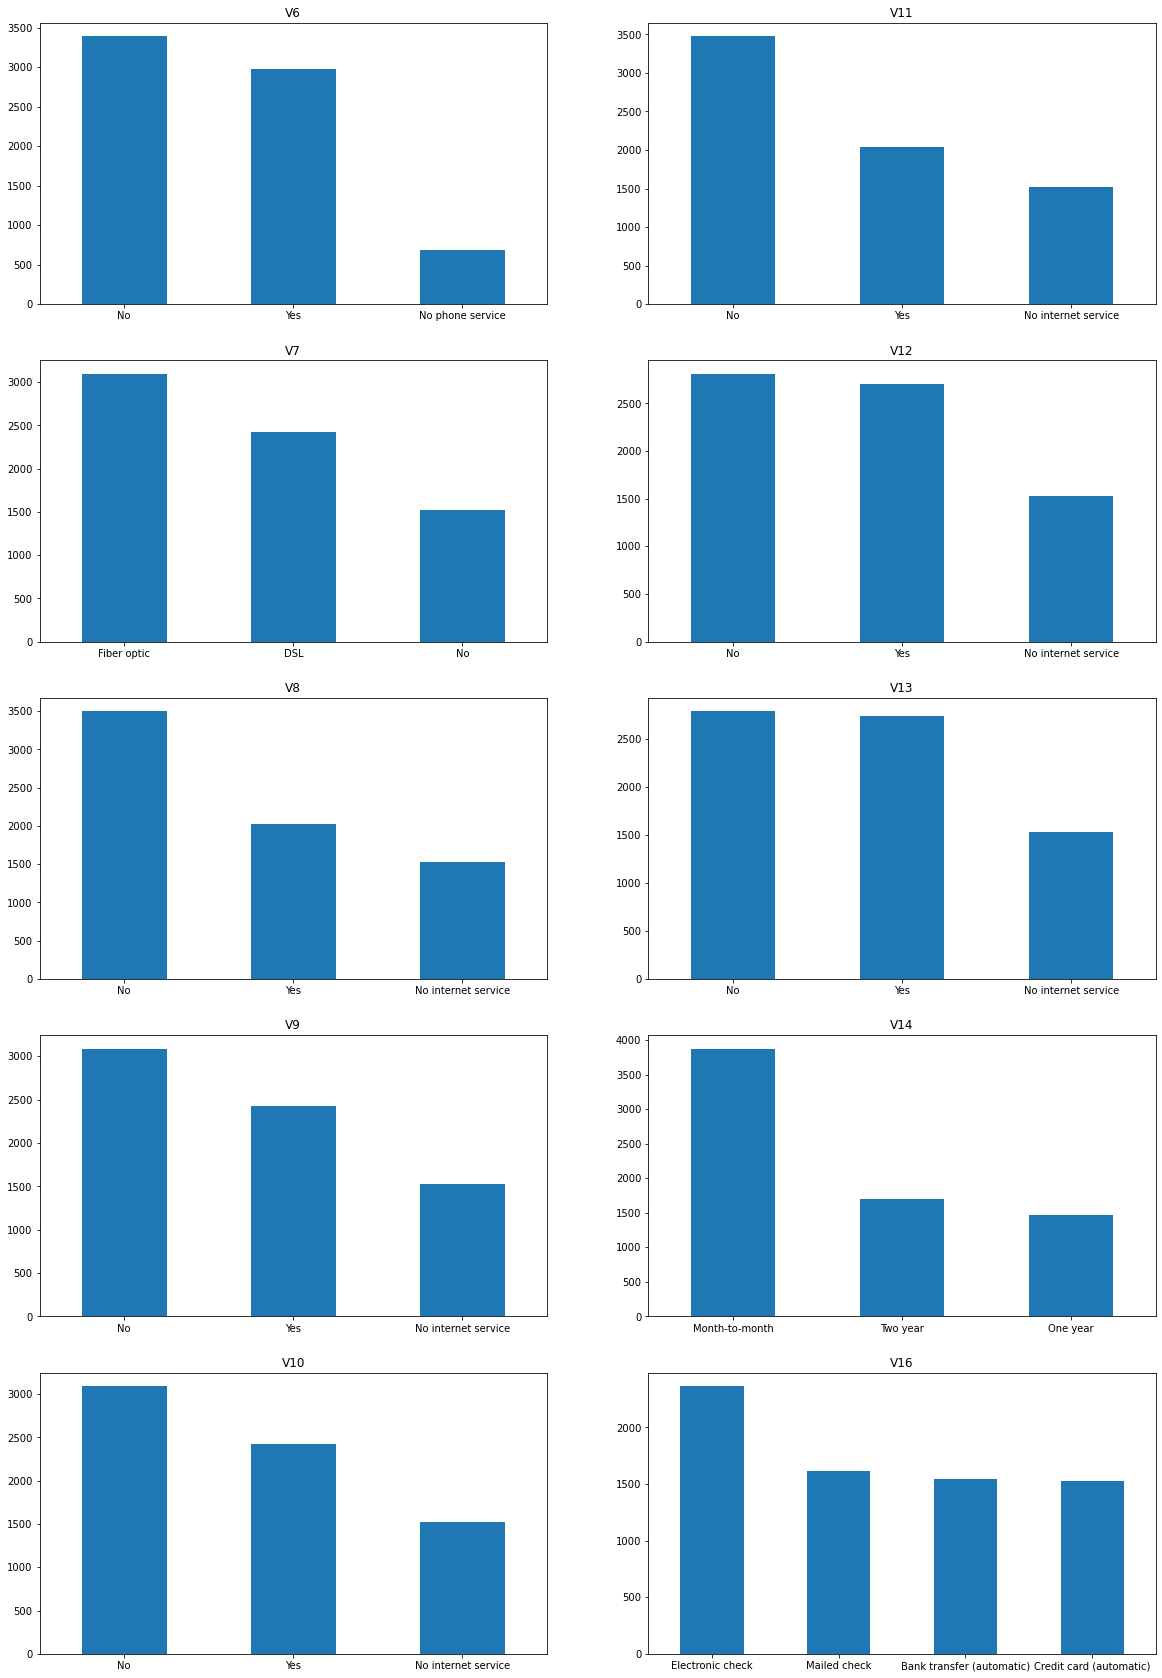

In [22]:
fig, axes = plt.subplots(nrows = 5,ncols = 2,figsize = (20,30))
for i, item in enumerate(Multi_Class):
    if i < 5:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i,0], rot=0)
    
    elif i <= 9:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-5,1], rot=0)
    ax.set_title(item)

### Transforming the data 

In [23]:
#Label encoding of binary columns
le = LabelEncoder()
for i in Binary_Class:
    df[i] = le.fit_transform(df[i])

In [24]:
df.head()

,gender,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [25]:
df.shape

(7043, 20)

In [26]:
#split multi class category as dummies
multi_class_dummies = pd.get_dummies(df[Multi_Class])
multi_class_dummies.head()

,V6_No,V6_No phone service,V6_Yes,V7_DSL,V7_Fiber optic,V7_No,V8_No,V8_No internet service,V8_Yes,V9_No,...,V13_No,V13_No internet service,V13_Yes,V14_Month-to-month,V14_One year,V14_Two year,V16_Bank transfer (automatic),V16_Credit card (automatic),V16_Electronic check,V16_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [27]:
#Dimension of binary class
df[Binary_Class].shape

(7043, 6)

In [28]:
#Dimension of multi class
df[Multi_Class].shape

(7043, 10)

In [29]:
#Counting total numeric columns
df[Num_Cols].shape

(7043, 4)

In [30]:
#Concate numeric columns, binary class columns and multi_class_dummies dataframe.
new_df = pd.concat([df[Num_Cols], df[Binary_Class],multi_class_dummies], axis=1)
new_df.shape

(7043, 41)

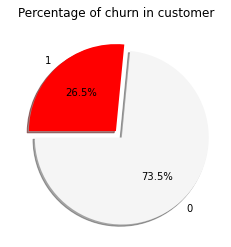

In [31]:
# Data to plot
labels = new_df['Churn'].value_counts(sort=True).index
sizes = new_df['Churn'].value_counts(sort=True)

colors = ['whitesmoke', 'red']
explode = [0.1, 0] # Explode 1st slice

#Plot pie chart 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Percentage of churn in customer")
plt.show()

In [32]:
sizes

0    5174
1    1869
Name: Churn, dtype: int64

### Correlation 

Lets check the correlation between the variables 

In [33]:
#Correlation
corr = new_df.corr()

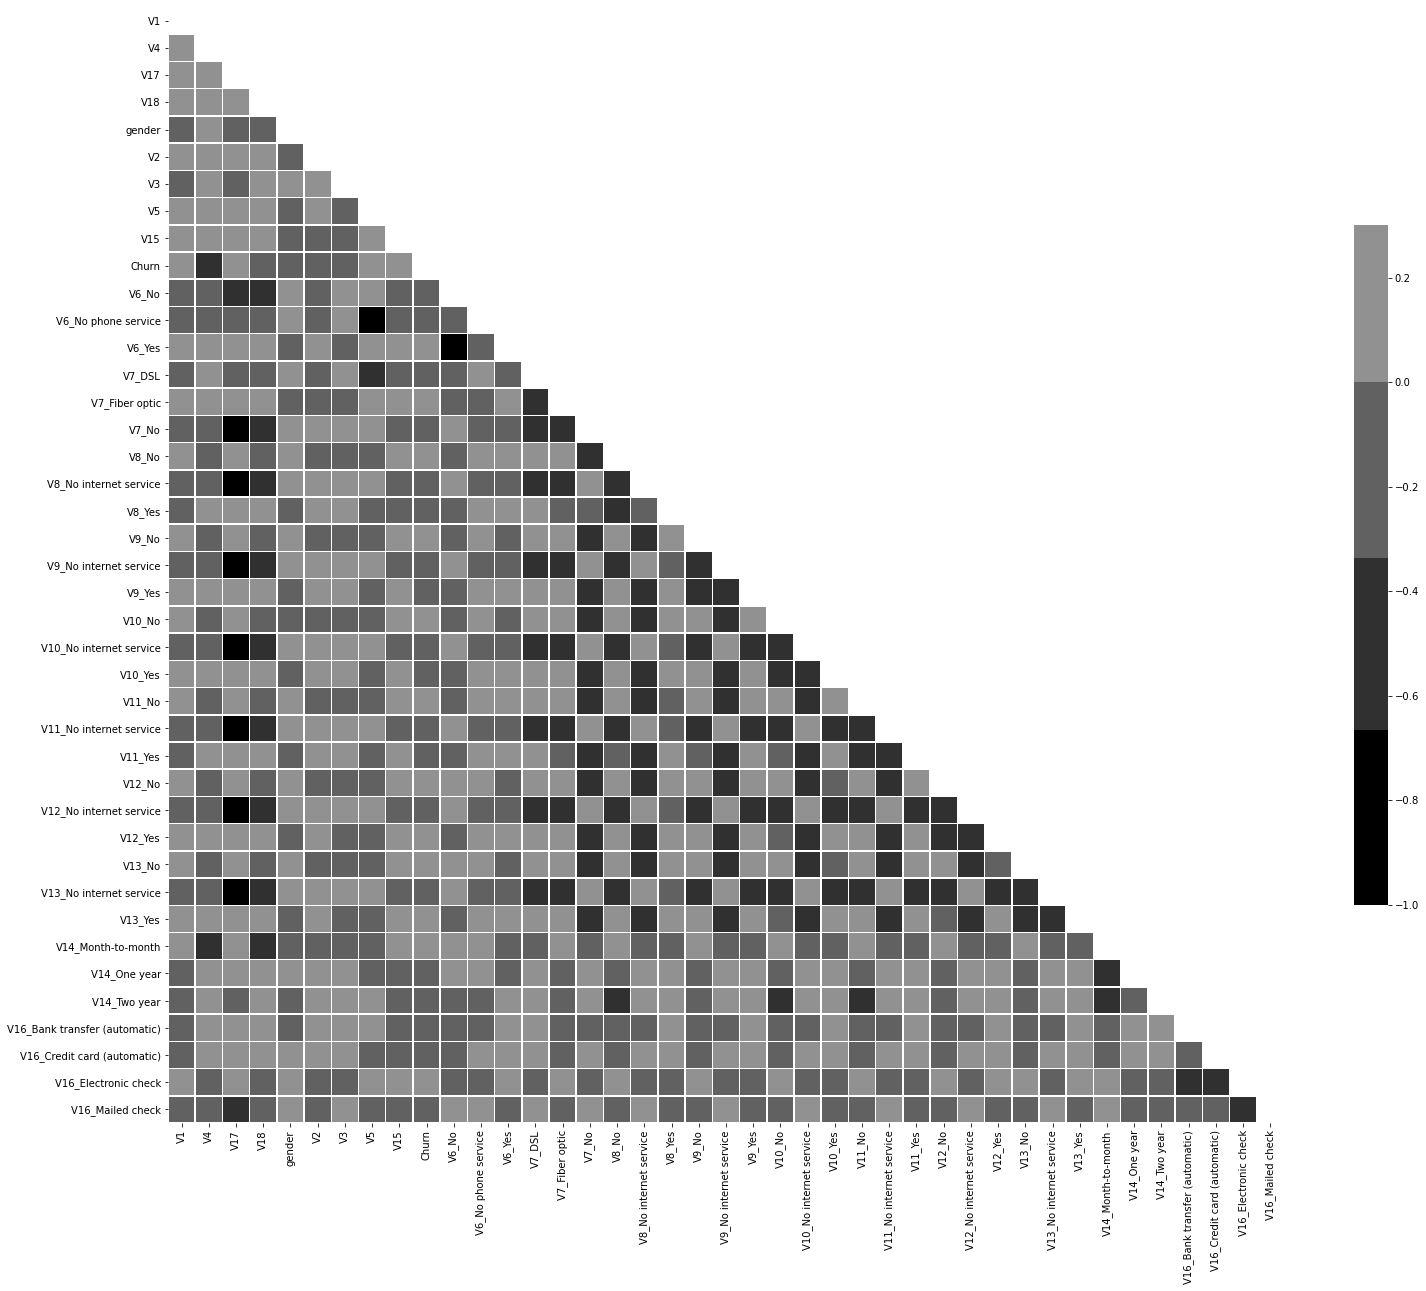

In [34]:
#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25,25))

#Generate a custom diverging colormap
cmap = sns.light_palette('black', reverse=True)


#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={'shrink' : 0.5})

From the above heatmap we can see the highly correlated variables with dark green associated
For example

V4 variable is highly correlated with V14 Month to Month and Churn V17 is correlated with most of the variables with No internete service and NO classes.

Like the above examples we can interpret the variables with most correlated in the same data set

### Important Variables

In [35]:
X = new_df.loc[:,new_df.columns != 'Churn']
y = new_df['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

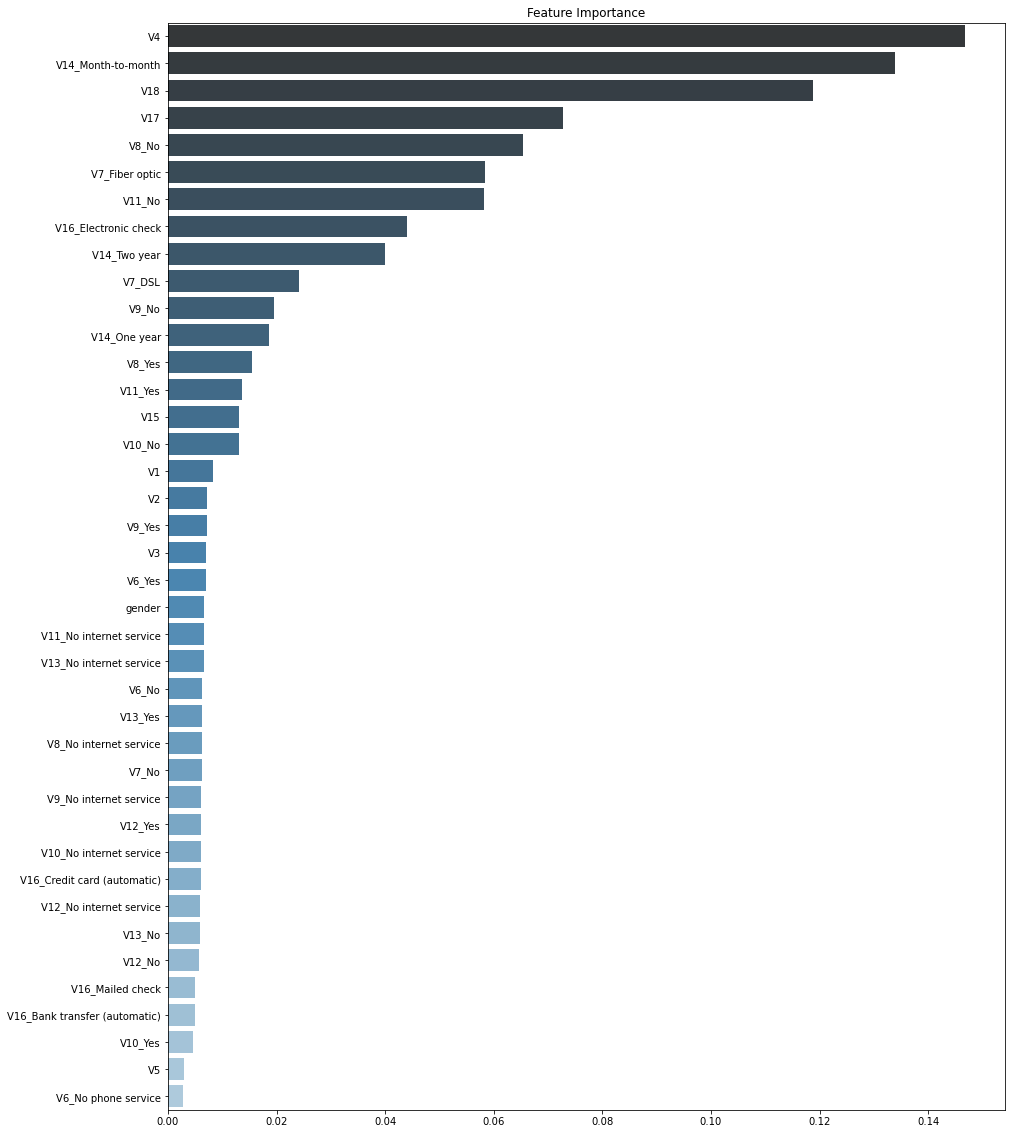

In [36]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'random_state' : 0, 'n_jobs' : 4, 'n_estimators' : 5000, 'max_depth' : 8}

# Fit Random Forest Classifier
clf = RandomForestClassifier(**parameters)
clf = clf.fit(X,y)

#Plot features Importance
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(15,20))
plt.title('Feature Importance')
ax = sns.barplot(y=imp.index, x=imp.values, palette='Blues_d', orient='h')

Since V4 having the highest important variables lets look more closely

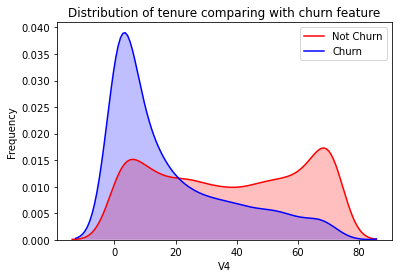

In [37]:
#V4 distribution
g = sns.kdeplot(new_df.V4[(new_df['Churn'] == 0) ], color='Red', shade=True)
g = sns.kdeplot(new_df.V4[(new_df['Churn'] == 1) ], color='Blue', ax=g, shade=True)
g.set_xlabel('V4')
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(['Not Churn','Churn'])

There is a chance that customer will churn based on V4 . Lesser the range more chance of churn 

In [38]:
print(sorted(new_df['V4'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]


###  Using Grid search CV and SVM classifier

In [39]:
# Define model parameters to tune
model_parameters = {
    'C' : [1,10,100,1000],
    'class_weight' : [None,'balanced'],
    'gamma' : [0.1,0.01,0.001,0.0001]
}

In [40]:
#GridSearch the parameters to find the best parameters
model = SVC(probability=True)

gscv = GridSearchCV(estimator=model,
                   param_grid= model_parameters,
                    cv=5,
                    verbose=1,
                    n_jobs=-1,
                    scoring='f1'
                   )

gscv.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 62.8min finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [42]:
print("Best parameters are : ",gscv.best_params_)

Best parameters are :  {'C': 10, 'class_weight': 'balanced', 'gamma': 0.0001}


In [43]:
#Divide independent and dependent variable
X = new_df.drop('Churn',axis=1)
y = new_df['Churn']

In [44]:
X.shape, y.shape

((7043, 40), (7043,))

In [45]:
#Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 40), (1409, 40), (5634,), (1409,))

In [47]:
svm = SVC(C=10, class_weight='balanced', gamma=0.0001)
svm.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', gamma=0.0001)

In [48]:
y_pred = svm.predict(X_test)

In [49]:
svm.score(X_train,y_train)

0.7497337593184239

In [50]:
svm.score(X_test, y_test)

0.7253371185237757

In [51]:
print("Accuracy score : ",accuracy_score(y_pred, y_test))
print("Precision score : ",precision_score(y_pred, y_test))
print("Recall score : ",recall_score(y_pred, y_test))
print("F1-Score : ",f1_score(y_pred, y_test))
print("roc_auc_score : ",roc_auc_score(y_pred, y_test))

Accuracy score :  0.7253371185237757
Precision score :  0.7383419689119171
Recall score :  0.4991243432574431
F1-Score :  0.5956112852664578
roc_auc_score :  0.689299641795786


In [52]:
print("Confusion matrix : ",confusion_matrix(y_pred, y_test),sep='\n')
print("\nclassification_report : ",classification_report(y_pred, y_test),sep='\n')

Confusion matrix : 
[[737 101]
 [286 285]]

classification_report : 
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       838
           1       0.74      0.50      0.60       571

    accuracy                           0.73      1409
   macro avg       0.73      0.69      0.69      1409
weighted avg       0.73      0.73      0.71      1409

